`scikit-learn` (o `sklearn`) es una librería que reúne muchas herramientas para realizar Minería de Datos y _Aprendizaje de Máquinas_. Permite hacer clasificación, clustering, entre otras. Además, incluye varios datasets para aprender a usar la librería.

En este tutorial vamos a reforzar los conceptos de _aprendizaje supervisado_ y a mostrar cómo usar `sklearn` para entrenar nuestro primer clasificador.

Puedes ejecutar cada una de las celdas de código haciendo click en ellas y presionando `Shift + Enter`, o bien haciendo click en el ícono ⏭ que aparece al lado izquierdo de la celda.

También puedes editar cualquiera de estas celdas. Las celdas no son independientes. Es decir, sí importa el orden en el que las ejecutes, y cualquier cambio que hagas se reflejará en las celdas que ejecutes después.

---

Cargamos el Iris Dataset que viene en `sklearn`. El dataset incluye atributos de 3 especies de flores.

In [38]:
from sklearn.datasets import load_iris

iris = load_iris()

print("Atributos:", iris.feature_names)
print()
print("5 primeras filas:")
print(iris.data[0:5])

Atributos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

5 primeras filas:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Los atributos del dataset son el largo y el ancho del pétalo y sépalo de cada flor.

<img src="https://sebastianraschka.com/images/blog/2014/intro_supervised_learning/iris_petal_sepal_1.png" alt="" style="width: 1000px;"/>


Las están dadas por el campo `target`, y los distintos tipos de `target` en el campo `target_names`:

In [39]:
print("target_names:", iris.target_names)
print()
print("Valores de la columna")
print(iris.target)

# vemos que hay 150 observaciones, 50 de cada una de las clases.

target_names: ['setosa' 'versicolor' 'virginica']

Valores de la columna
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Vemos que los primeros valores de la columna `target` son ceros en vez del nombre de la especie. Lo que se usa comúnmente es _mapear_ (asignar) números a variables categóricas. En este caso, el 0 corresponde a la primera especie en  `target_names`, es decir, a _iris setosa_. El 1 corresponde a _iris versicolor_ y el 2 a _iris virginica_.

Los datos que vienen en `sklearn` ya están listos para ser usados con los métodos de la librería. Si hubiésemos recibido los datos como una tabla, éstos se verían más o menos así:

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target          |
|-------------------|------------------|-------------------|------------------|-----------------|
| 5.1               | 3.5              | 1.4               | 0.2              | iris-setosa     |
| 4.9               | 3                | 1.4               | 0.2              | iris-setosa     |
| ...               | ...              | ...               | ...              | ...             |
| 5                 | 2                | 3.5               | 1                | iris-versicolor |
| 5.9               | 3                | 5.1               | 1.8              | iris-virginica  |


Una tarea que se nos podría plantear sería determinar, dados los atributos de una flor, cuál es la especie a la que corresponde. Por ejemplo, ¿a cuál especie corresponde la flor con los siguientes atributos?

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target |
|-------------------|------------------|-------------------|------------------|--------|
| 4.8               | 3                | 1.4               | 0.1              | ???    |

## Nuestro primer clasificador

Vamos a usar un _árbol de decisión_ como nuestro primer clasificador. Un árbol de decisión para este problema puede verse como el de la siguiente imagen:

![](https://sebastianraschka.com/images/blog/2014/intro_supervised_learning/decision_tree_1.png)

Nota que podemos mirar cualquiera de los atributos primero, o no usar algún otro atributo, por ejemplo:

![](https://www.ibm.com/developerworks/library/ba-predictive-analytics2/fig06.gif)

En el último caso no usamos el `petal width` como atributo para el árbol. Y así, podemos tener muchos árboles distintos.

El proceso de _entrenar un clasificador_ corresponde al proceso de —en este caso— encontrar las reglas del árbol que _mejor se adapten a nuestros datos_. Llamaremos al árbol resultante el _**modelo**_.

In [40]:
from sklearn.tree import DecisionTreeClassifier

# creamos un nuevo clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# entrenamos el árbol, entregándole los datos de entrenamiento
clf.fit(iris.data, iris.target)

# el resultado de clf.fit() es el objeto DecisionTreeClassifier con los parámetros que usó para entrenar

DecisionTreeClassifier()

Podemos visualizar el árbol generado usando graphviz

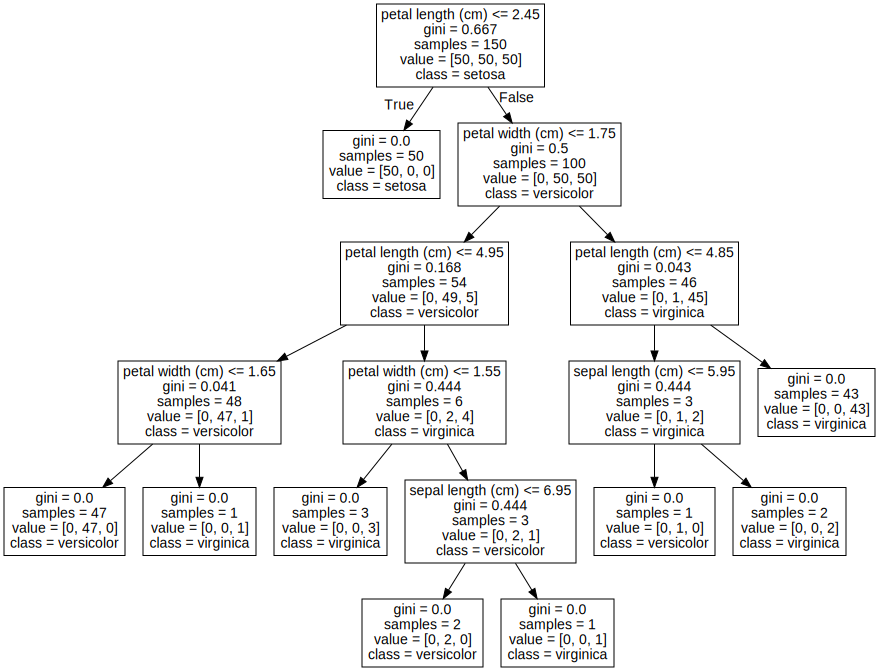

In [41]:
from sklearn import tree
import graphviz

gv = tree.export_graphviz(clf,
                          out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names)
graphviz.Source(gv)

## ¿Cómo evaluamos nuestro modelo?

¿Cómo sabemos qué tan bien le fue? Es decir, ¿logró _aprender_ desde los datos cuáles eran las mejores reglas?

Una forma de ver esto es usando el modelo para clasificar nuevas instancias de los datos.

Sin embargo, no tenemos _nuevas_ instancias, ya que entrenamos el clasificador con _todos_ los datos disponibles. Si evaluamos nuestro clasificador con los _datos de entrenamiento_ (es decir, los datos que usamos para entrenar el clasificador y generar un modelo), vamos a tener resultados **sobre-optimistas**, ya que el clasificador usó esos mismos datos para entrenar. Es como si fueras a dar una prueba y usaras la misma prueba con las respuestas para estudiar.

Esto también nos entrega una pista sobre qué significa que un clasificador _aprenda_ de los datos. Para que un modelo se considere _bueno_, no basta con que clasifique correctamente los datos que usó para entrenar, sino que debe clasificar correctamente datos que _no ha visto antes_. Esto es a lo que se llama la capacidad de _generalización_ del modelo.

Vamos a definir un par de conceptos antes de continuar:

- El **conjunto de datos de entrenamiento**, o **training set**, es el conjunto de datos que le damos al clasificador para que pueda encontrar las reglas o parámetros óptimos que le permitan predecir la clase de estos datos.

- El **conjunto de datos de prueba**, o **test set**, es el conjunto de datos sobre el cual vamos a evaluar el rendimiento de nuestro modelo. **Estos datos se eligen antes de cualquier modificación o limpieza del dataset, y sólo se usan para evaluar el modelo entrenado**.

(Una vez seguros de que nuestro modelo funciona bien y queremos usarlo "en producción", podemos entrenar con todos los datos disponibles. No antes)

El último punto es muy importante. Si por ejemplo, normalizamos los datos primero, y _después_ separamos en training y test sets, estaremos "contaminando" nuestros datos de entrenamiento, dándoles información del test set y en cierta forma "haciendo trampa", afectando la capacidad de generalización del modelo resultante.


### Holdout

Ahora vamos a tomar una muestra de los datos y separarlos en training set y test set, respectivamente. ¿Cómo determinamos esta muestra?

In [42]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# train_test_split separa X e y en dos conjuntos, train y test
# como hace un muestreo aleatorio, el resultado depende de algún proceso al azar
# el parámetro random_state fija la _semilla aleatoria_ de forma que el resultado siempre será el mismo
# esto es muy útil cuando uno quiere poder reproducir los resultados
# (el uso de 12 como la semilla es totalmente arbitrario)
# a todos ustedes les dará exactamente la misma partición de los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

Ahora podemos entrenar sólo con el training set:

In [43]:
clf = DecisionTreeClassifier(random_state=12)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

Para evaluar, predecimos usando una de las observaciones en el test set y contrastamos el resultado con la respuesta correcta:

In [44]:
x_ = X_test[0]
y_ = y_test[0]

# la clase es iris-versicolor
print("data:", x_)
print("clase:", y_)

# [x] es una lista que contiene como elemento a x
# predict recibe una lista de inputs y retorna un arreglo de enteros,
# cada entero es la clase que predice para cada elemento en la lista input
clf.predict([x_])

data: [5.  3.5 1.3 0.3]
clase: 0


array([0])

Vemos que acertó en este caso. En `sklearn` hay métodos que automatizan este proceso.

In [45]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.96


In [46]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=12)
reg.fit(X_train, y_train)

LogisticRegression(random_state=12)

In [47]:
x_ = X_test[0]
y_ = y_test[0]

# la clase es iris-versicolor
print("data:", x_)
print("clase:", y_)

# [x] es una lista que contiene como elemento a x
# predict recibe una lista de inputs y retorna un arreglo de enteros,
# cada entero es la clase que predice para cada elemento en la lista input
reg.predict([x_])

data: [5.  3.5 1.3 0.3]
clase: 0


array([0])

In [48]:
y_reg_pred = reg.predict(X_test)

print(accuracy_score(y_test, y_reg_pred))

0.98


Vemos que el _accuracy_ es de un 96% en el árbol de decisión y un 98% en la regresión logística. Esto significa que clasificó correctamente el 96% y 98% respectivamente de los datos en `X_test`.

Surgen dos preguntas a partir de esto:

1. ¿Tuvimos suerte? Es decir, si hubiésemos elegido otra partición train/test, ¿obtendríamos resultados diferentes?
2. ¿Qué pasa si las clases están desbalanceadas? ¿Cómo afecta al accuracy si tenemos, por ejemplo, 99% de una clase y 1% de otra?

### Cross-Validation

_¿Tuvimos suerte? Es decir, si hubiésemos elegido otra partición train/test, ¿obtendríamos resultados diferentes?_

Cross-validation nos ayuda a disminuir el efecto del azar (pregunta 1). Por ejemplo, observa qué pasa si cambiamos la semilla aleatoria:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)

clf = DecisionTreeClassifier(random_state=37)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.98


In [50]:
reg = LogisticRegression(random_state=37)
reg.fit(X_train, y_train)
y_reg_pred = reg.predict(X_test)

print(accuracy_score(y_test, y_reg_pred))

0.98


Para disminuir el efecto, _cross-validation_ particiona los datos en $k$ partes iguales, entrena con $k-1$ partes, evalúa en la $k$-ésima, guarda el resultado, y vuelve a repetir el proceso con otras $k-1$ partes hasta haber recorrido todas las partes. Este proceso se llama $k$-fold cross-validation.

Observa que esto implica que el clasificador se entrenará $k$ veces, lo cual puede ser costoso dependiendo del clasificador y de la cantidad de datos.

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

In [51]:
from sklearn.model_selection import KFold

# 10-fold cv
kf = KFold(n_splits=10)

accuracies = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index, sep='\n')
    print()

    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier(random_state=12)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print()
print(accuracies)
print(sum(accuracies) / len(accuracies))

TRAIN:
[ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
TEST:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

TRAIN:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 1

In [52]:
from sklearn.model_selection import KFold

# 10-fold cv
kf = KFold(n_splits=10)

accuracies = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index, sep='\n')
    print()

    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    reg = LogisticRegression(random_state=12)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print()
print(accuracies)
print(sum(accuracies) / len(accuracies))

TRAIN:
[ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
TEST:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

TRAIN:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 1

Vemos que el promedio de los accuracies es $0.94$, más bajo que el $0.96$ y $0.98$ que obtuvimos antes.

Un caso extremo de cross-validation es cuando $k = N$, el número de filas en el dataset. Esto significa que vamos a entrenar $N$ veces el clasificador, y cada vez lo vamos a evaluar mirando _un sólo dato a la vez_. Esta forma de cross-validation se llama _leave one out_ (LOO). LOO es útil cuando tenemos pocos datos para entrenar, por lo que dejar, por ejemplo, el 20% de los datos como testing puede ser considerable.

In [53]:
# 150-fold cv
kf = KFold(n_splits=150)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier(random_state=12)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.9466666666666667


Un problema con `KFold` es que siempre hace las particiones en los mismos lugares. Por ejemplo, observa qué pasa en este caso:

In [54]:
kf = KFold(n_splits=3)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier(random_state=12)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.0


In [55]:
kf = KFold(n_splits=3)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    reg = LogisticRegression(random_state=12)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.0


¿Por qué el accuracy es 0?

In [56]:
# ejemplo con shuffle=True, es decir mezclar los datos

kf = KFold(n_splits=3, shuffle=True, random_state=12)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier(random_state=12)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.94


In [57]:
# ejemplo con shuffle=True, es decir mezclar los datos

kf = KFold(n_splits=3, shuffle=True, random_state=12)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    reg = LogisticRegression(random_state=12)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.96


Por otra parte, si las clases están desbalanceadas, es necesario hacer un muestreo estratificado (es decir, la distribución de clases de la muestra debe ser fiel a la distribución de clases original). Para eso podemos usar `StratifiedKFold`:

In [58]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3)

accuracies = []

# en este caso hay que entregarle tanto X como y a kf.split, ya que hará un split estratificado
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    clf = DecisionTreeClassifier(random_state=12)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.96


In [59]:
kf = StratifiedKFold(n_splits=3)

accuracies = []

# en este caso hay que entregarle tanto X como y a kf.split, ya que hará un split estratificado
for train_index, test_index in kf.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]

    y_train = y[train_index]
    y_test = y[test_index]

    reg = LogisticRegression(random_state=12)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.9733333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Medidas de rendimiento de un clasificador

Volvamos a las preguntas que nos planteamos más arriba:

1. ¿Tuvimos suerte? Es decir, si hubiésemos elegido otra partición train/test, ¿obtendríamos resultados diferentes?
2. ¿Qué pasa si las clases están desbalanceadas? ¿Cómo afecta al accuracy si tenemos, por ejemplo, 99% de una clase y 1% de otra?

La (1) la respondimos disminuyendo el factor del azar evaluando varias veces con distintas muestras de los datos usando cross-validation.

Ahora, ¿qué pasa con el accuracy si tenemos clases desbalanceadas?

## Clasificador _dummy_

Un clasificador _dummy_ es un clasficador que no aprende nada de los datos, sino que sus reglas son siempre fijas.

Por ejemplo, imagina un modelo (para dos clases) que cada vez que viene una nueva observación, lanza una moneda, y dice clase A con un 50% de probabilidad, o clase B con un 50% de probabilidad. Si en los datos de prueba las clases A y B están balanceadas, el clasificador tendrá un 50% de accuracy, _sin haber aprendido nada sobre los datos_.

De esto se desprende la necesidad de un _baseline_. Es decir, sin hacer nada de esfuerzo, ¿cuál es el mínimo accuracy que puedo obtener? Piensa que si entrenara un clasificador muy sofisticado, y éste al final obtuviese un accuracy menor al baseline, entonces estamos haciendo algo muy mal. El baseline nos permite tener un punto de comparación (el baseline no tiene por qué ser algo muy simple tampoco).

In [60]:
from sklearn.dummy import DummyClassifier

kf = StratifiedKFold(n_splits=3)

accuracies = []

# vamos a repetir el proceso 100 veces

for i in range(100):
    for train_index, test_index in kf.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        # creamos el dummy classifier con estrategia al azar uniforme
        clf = DummyClassifier(strategy="uniform")
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

print(sum(accuracies) / len(accuracies))

0.3370666666666667


Vemos que el accuracy promedio es de aproximadamente 33%, que es la proporción de elementos por cada clase.

## Matriz de confusión, Precision y Recall

La _matriz de confusión_ nos permite observar los errores del clasificador:

In [61]:
from sklearn.metrics import confusion_matrix

random_seed = 54

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

clf = DecisionTreeClassifier(random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 17,  1],
       [ 0,  2, 18]])

In [62]:
reg = LogisticRegression(random_state=random_seed)
reg.fit(X_train, y_train)
y_reg_pred = clf.predict(X_test)

confusion_matrix(y_test, y_reg_pred)

array([[12,  0,  0],
       [ 0, 17,  1],
       [ 0,  2, 18]])

La matriz se interpeta de la siguiente forma:

| iris-setosa  | iris-versicolor  | iris-virginica  | ← clasificado como / clase real ↓ |
|:----:|:----:|:----:|--------------------:|
| 12 | 0  | 0  |              **iris-setosa** |
| 0  | 17  | 1  |              **iris-versicolor** |
| 0  | 2 | 18 |              **iris-virginica** |

Por cada clase, podemos determinar el tipo de error que el modelo hace.

- **Verdaderos Positivos (TP)**: el dato X es de la clase C, y el modelo clasifica X como C.
- **Verdaderos Negativos (TN)**: el dato X no es de la clase C, y el modelo clasifica X como algo que no es C.
- **Falsos Positivos (FP)**: el dato X no es de la clase C, pero el modelo clasifica a X como C.
- **Falsos Negativos (FN)**: el dato X es de la clase C, pero el modelo clasifica a X como algo que no es C.

A partir de estas medidas, definimos dos medidas nuevas para una clase, _precision_ y _recall_:

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP+FN}$$

Nota que estas medidas son para una clase en particular. La medida para todo el dataset puede ser el promedio de la medida para cada clase.

Ver más en https://en.wikipedia.org/wiki/Precision_and_recall

In [63]:
from sklearn.metrics import classification_report

random_seed = 54

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

clf = DecisionTreeClassifier(random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.94      0.92        18
           2       0.95      0.90      0.92        20

    accuracy                           0.94        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.94      0.94      0.94        50



In [64]:
reg = LogisticRegression(random_state=random_seed)
reg.fit(X_train, y_train)
y_reg_pred = clf.predict(X_test)

print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.94      0.92        18
           2       0.95      0.90      0.92        20

    accuracy                           0.94        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.94      0.94      0.94        50



In [65]:
#Dibujo de matriz de confusión
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión Normalizada')
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
random_seed = 60

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

In [67]:
#Cargamos componente
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# seteamos el valor de Cross-validation
skf = StratifiedKFold(n_splits=8)
# Se define scoring por el cual obtendremos el mejor modelo, puede ser "Accuracy", "recall", "precision". Esto es para la evaluación pero le agregamos al entrenamiento
scoring_def = 'accuracy'

In [68]:
# Buscamos el mejor modelo de acuerdo a todos los parámetros generados
params1 = {"max_depth": [4, 6, 8, 10, 12],
          "criterion" : ['gini','entropy'],
          "class_weight": ['balanced_subsample','balanced'],
          "min_samples_split": [2, 4, 6]}
model1 = DecisionTreeClassifier()
grid1 = GridSearchCV(estimator=model1, param_grid=params1,cv=skf, scoring=scoring_def)
grid1.fit(X_train, y_train)

# Se realiza la predicción del set de test con el mejor modelo
Yhat1 = grid1.best_estimator_.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [69]:
print(grid1.best_score_)
print(grid1.best_params_)
print(grid1.best_estimator_)

0.9599358974358974
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6)


Matriz de confusión sin normalizar
[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


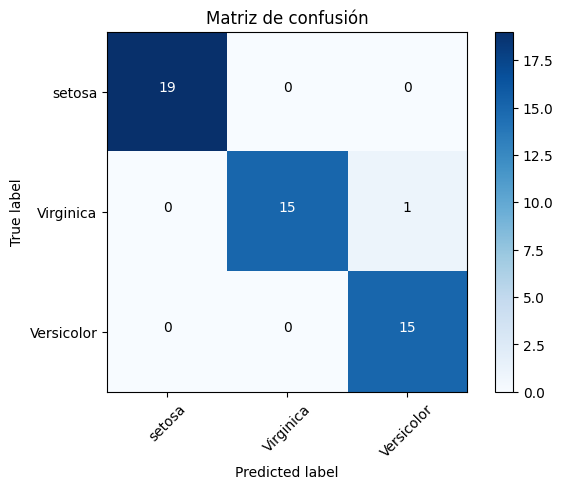

In [70]:
LABELS = ["setosa","Virginica",'Versicolor']
#print(classification_report(X_test, Yhat1))
cnf_matrix = confusion_matrix(y_test, Yhat1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

In [71]:
# Buscamos el mejor modelo de acuerdo a todos los parámetros generados
params3 = {"max_iter": [100],
          "penalty": ['l1', 'l2'],
          "class_weight": ['None','balanced'],
          "solver" : ['newton-cg','lbfgs','liblinear','sag','saga'],
          "C": [1, 2, 3]}

model3 = LogisticRegression()
grid3 = GridSearchCV(estimator=model3, param_grid=params3,cv=skf, scoring=scoring_def)
grid3.fit(X_train, y_train)

# Se realiza la predicción del set de test con el mejor modelo
Yhat3 = grid3.best_estimator_.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [72]:
print(grid3.best_score_)
print(grid3.best_params_)
print(grid3.best_estimator_)

0.9799679487179487
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
LogisticRegression(C=1, class_weight='balanced', solver='sag')


Matriz de confusión sin normalizar
[[19  0  0]
 [ 0 16  0]
 [ 0  1 14]]


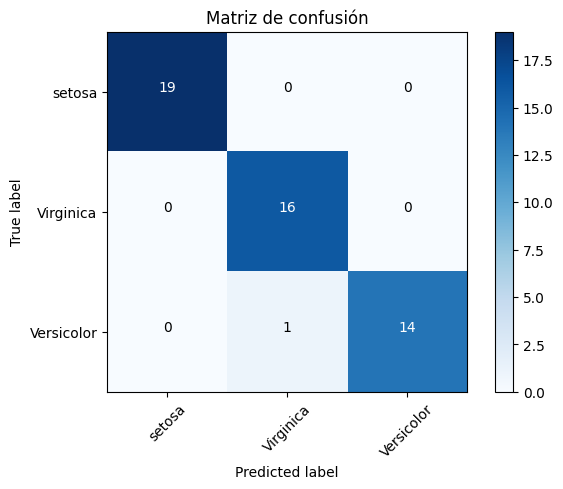

In [73]:
LABELS = ["setosa","Virginica",'Versicolor']
#print(classification_report(X_test, Yhat1))
cnf_matrix = confusion_matrix(y_test, Yhat3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

Cuando las clases están desbalanceadas, conviene mucho mirar el Precision y el Recall por cada clase.

# Overfitting

Algunas formas de evitar el overfitting:

- Evitar que nuestro modelo sea muy específico a los datos de entrenamiento (por ejemplo, evitando que el árbol de decisión tenga muchas ramas). Es decir, preferir modelos simples a modelos complejos.
- Usar cross-validation para tener una mejor garantía del rendimiento con datos nuevos (aunque esto no es posible si el entrenamiento toma mucho tiempo).
- No "contaminar" los datos de entrenamiento con los datos de prueba, o viceversa.
- Normalizar los datos o tratar de disminuir el ruido de éstos. Tener cuidado con los outliers.
- Tener más datos :-)

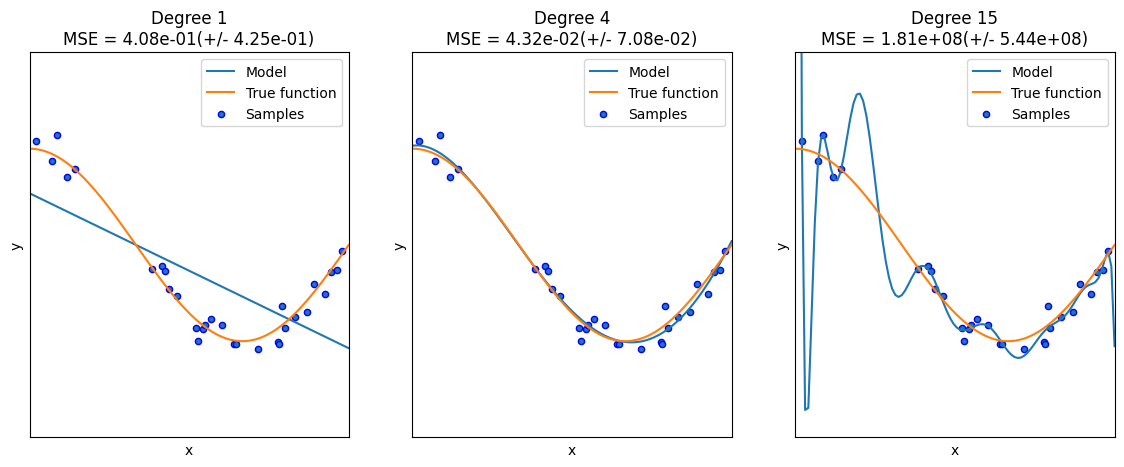

In [74]:
# ejemplo obtenido de http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


# En conclusión

El flujo usual a la hora de entrenar un clasificador es el siguiente:

1. Tener datos. Verificar la fuente de los datos, la existencia de sesgos (sesgo de selección, sesgo del superviviente, sesgos sociodemográficos, etc.).
2. Separar datos en train y test set.
3. Realizar exploración y limpieza de datos en ambos sets, de manera independiente.
4. Elegir clasificadores apropiados para el dominio del problema (próxima clase de cátedra)
5. Determinar métricas de entrenamiento usando cross-validation, si es posible (más de esto en el lab de mañana).
6. Evaluar en el test set.
7. Usar todos los datos para entrenar el modelo que irá "a producción"

# Referencias

1. Documentación de scikit-learn. http://scikit-learn.org/stable/index.html
2. Precision y Recall. https://en.wikipedia.org/wiki/Precision_and_recall
3. Machine Learning 101 (Google). https://docs.google.com/presentation/d/1kSuQyW5DTnkVaZEjGYCkfOxvzCqGEFzWBy4e9Uedd9k/preview?imm_mid=0f9b7e&cmp=em-data-na-na-newsltr_20171213#slide=id.g168a3288f7_0_58
4. WEKA (un programa visual con clasificadores y otras herramientas para ML). https://www.cs.waikato.ac.nz/ml/weka/
5. Curso de Data Mining con WEKA. https://www.cs.waikato.ac.nz/ml/weka/mooc/dataminingwithweka/